<a href="https://colab.research.google.com/github/sherryHuan/CS4410/blob/main/Lab_7_%5BSOLUTIONS%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab #7: Logistic Regression**
---

### **Description**
In this lab, we'll learn how to use logistic regression to classify data into different categories. We'll practice with binary classification, where the goal is to separate data into two categories, and multiclass classification, where the goal is to separate data into more than two categories.

<br>

### **Lab Structure**
**Part 1**: [Breast Cancer Dataset](#p1)

**Part 2**: [Digits Dataset](#p2)

**Part 3**: [[HOMEWORK] College Admissions Dataset](#p3)

**Part 4**: [[HOMEWORK] Water Quality Dataset](#p4)

<br>

### **Goals**
By the end of this lab, you will:
* Know how to implement logistic regression for binary classification.
* Know how to implement logistic regression for multiclass classification.
* Understand how to validate models by choosing an appropriate metric and using the validation dataset.

<br>

### **Cheat Sheets**
* [Logistic Regression with sklearn](https://docs.google.com/document/d/1MvegdoZjh90ujpmK6KqOyfwUPKjjLMkCrqqhvQPxpgM/edit?usp=drive_link)

<br>

**Before starting, run the code below to import all necessary functions and libraries.**


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer, load_digits

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<a name="p1"></a>

---
## **Part 1: Practice Together**
---
#### **About the Dataset**
We've already used the Breast Cancer dataset to create a KNN model for classification; now it's time to create a logistic regression model using it. This dataset contains mammography exam results and whether or not cancer was detected.

The features are as follows:
* `radius`
* `texture`: standard deviation of gray-scale values
* `perimeter`
* `area`
* `smoothness`: local variations in radius lengths
* `compactness`: perimeter^2 / area - 1
* `concavity`: severity of concave portions of the contour
* `concave points`: number of concave portions of the contour
* `symmetry`
* `fractal dimension`: "coastline approximation" - 1

Note: There is data recorded for the mean, standard error, and worst (or largest) for each feature, resulting in 30 total features.
<br>

#### **Your Task**
Using the Breast Cancer dataset, we will do the following:
* Create a logistic regression model in order to classify breast cancer tumors as malignant (0) or benign (1).

### **Step #1: Load the data**

Use the following code to load the breast cancer dataset.

In [ ]:
data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### **Step #2: Decide independent and dependent variables**

We will be using all features except `target` as our independent variables for predicting `target`.

In [ ]:
X = data.data
print(len(X[0]))
y = data.target

30


### **Step #3: Split the data into train and test sets**

###### **Solution**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Step #4: Import the Logistic Regression algorithm**

###### **Solution**

In [ ]:
# import the logistic regression algorithm
from sklearn.linear_model import LogisticRegression

### **Step #5: Initialize the model**


#####**Solution**

In [ ]:
# initialize
clf = LogisticRegression()

### **Step #6: Fit your model and make predictions for the test data**


In [ ]:
#fit

y_pred = # COMPLETE THIS LINE

y_pred_proba = # COMPLETE THIS LINE

y_pred_binary = # COMPLETE THIS LINE

SyntaxError: ignored

###### **Solution**

In [ ]:
#fit
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
#y_pred

y_pred_proba = clf.predict_proba(X_test)
#y_pred_proba

y_pred_binary = (y_pred_proba[:, 1] > 0.5).astype(int)
print(y_pred_proba)
print(y_pred_binary)

[[1.14034087e-01 8.85965913e-01]
 [9.99999989e-01 1.08546708e-08]
 [9.92843752e-01 7.15624834e-03]
 [4.64464244e-03 9.95355358e-01]
 [1.64196571e-03 9.98358034e-01]
 [9.99999999e-01 1.00096259e-09]
 [1.00000000e+00 2.47385914e-12]
 [9.94851344e-01 5.14865588e-03]
 [4.66687396e-03 9.95333126e-01]
 [2.28582523e-02 9.77141748e-01]
 [4.05252336e-02 9.59474766e-01]
 [9.99528504e-01 4.71496245e-04]
 [1.56523156e-02 9.84347684e-01]
 [5.01010326e-01 4.98989674e-01]
 [6.79674499e-03 9.93203255e-01]
 [9.98859338e-01 1.14066179e-03]
 [5.32034070e-03 9.94679659e-01]
 [2.82554013e-04 9.99717446e-01]
 [4.73268498e-03 9.95267315e-01]
 [9.99999551e-01 4.49021842e-07]
 [1.71057688e-01 8.28942312e-01]
 [3.46252698e-02 9.65374730e-01]
 [9.99999992e-01 7.60533594e-09]
 [5.13969816e-03 9.94860302e-01]
 [8.93009254e-03 9.91069907e-01]
 [1.08258332e-03 9.98917417e-01]
 [5.57588433e-03 9.94424116e-01]
 [3.45250042e-03 9.96547500e-01]
 [8.32740855e-03 9.91672591e-01]
 [9.99999859e-01 1.40724096e-07]
 [3.561306

### **Step #7: Evaluate the model**

Print the classification report. Then, run the code cell below to plot the ROC curve.


In [ ]:
report = # WRITE YOUR CODE HERE
print(report)

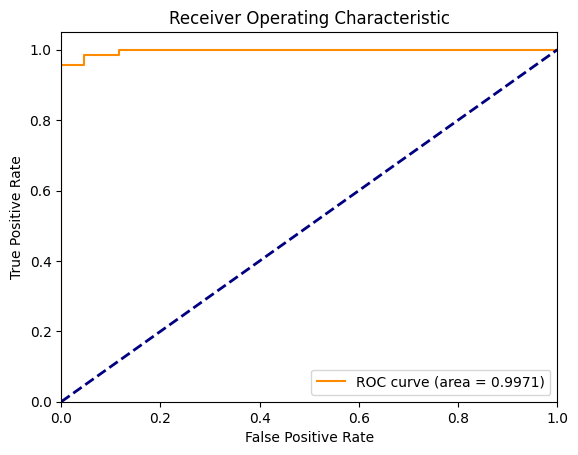

In [ ]:
# Plot Sensitivity (TPR) vs 1-Specificity (FPR)
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, threshold = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

###### **Solution**

In [ ]:
report = classification_report(y_test, y_pred, target_names=['Malignant', 'Benign' ])
print(report)

              precision    recall  f1-score   support

      Benign       0.98      0.93      0.95        43
   Malignant       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



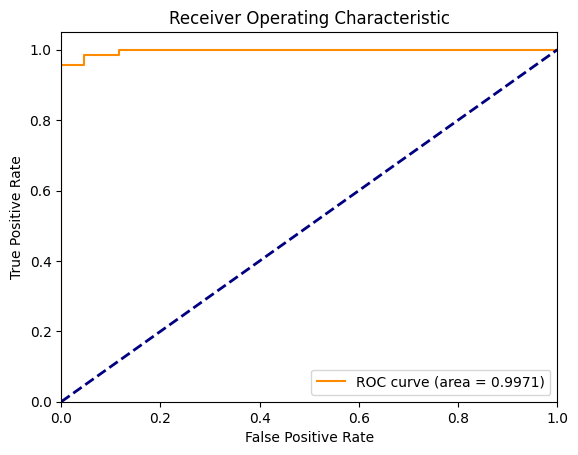

In [ ]:
# Plot Sensitivity (TPR) vs 1-Specificity (FPR)
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, threshold = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### **Reflection question**
Answer the following question:

1. What do the predicted probabilities represent in this context?
2. How is the threshold of 0.5 used to convert predicted probabilities into binary predictions?
3. What does precision mean for the Benign class in this model?
4. Would you trust this model?

#### **Solution**

1. The predicted probabilities represent the model's confidence that a given sample falls into a particular class. In this context, for the breast cancer dataset, the two classes are benign and malignant. So the model is providing its confidence level that a particular tumor is benign or malignant, with the probabilities of all classes for a given sample summing up to 1. For example, the first row [1.14034087e-01, 8.85965913e-01] means that the model predicts with approximately 11.4% probability that the first sample is benign and 88.6% probability that it's malignant.

2. The threshold of 0.5 is used as a decision boundary to convert predicted probabilities into binary predictions. If the predicted probability of the positive class (in this case, malignant) is greater than or equal to 0.5, the model will classify the tumor as malignant. If the probability is less than 0.5, the model will classify the tumor as benign. This threshold is used to simplify the output of the model to a binary outcome, but it can be adjusted based on the specific requirements of the situation, such as the relative costs of false positives and false negatives.

3. The precision for the Benign class represents what percentage of tumors predicted to be benign were actually benign.

4. No, because the accuracy is almost perfect, which makes the model unrealistic.

<center>

---
### **Back to Lecture**
---

<a name="p2"></a>

---
## **Part 2: Digits Dataset**
---
#### **About the Dataset**
Computer Vision is a growing field in AI. The Digits Dataset consists of 1,797 grayscale images of handwritten digits ranging from 0 through 9. Each image size is 8x8 pixels, each represented as a 64-dimensional feature vector.

The features are as follows:
* `pixel0, ..., pixel63`: integer pixel (0-16)
* `target`: class corresponding to digit (0-9)

<br>

#### **Your Task**
Using the Digits dataset, you will do the following:
* Create a logistic regression model that will classify each image (handwritten digit) into one of 10 classes (corresponding to the 10 digits)

### **Step #1: Load the data**

We have provided code to load the data into a dataframe and plot a sample.

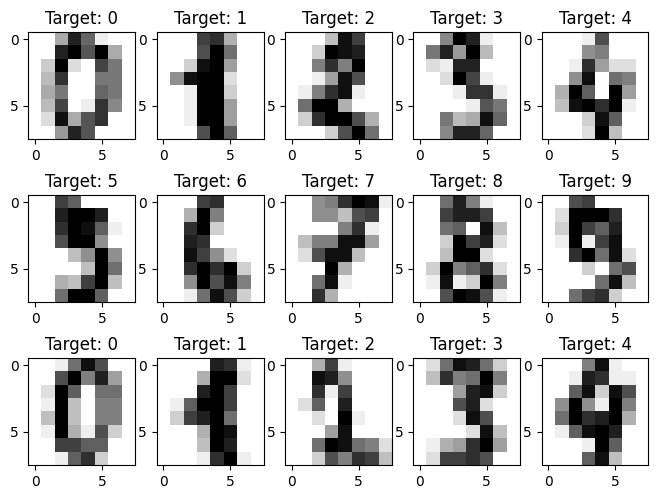

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [ ]:
data = load_digits()
df = pd.DataFrame(data.data, columns=[f'pixel{i}' for i in range(64)])
df['target'] = data.target

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(8, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(data.images[i], cmap='binary')
    ax.set_title(f'Target: {data.target[i]}')
plt.show()

df.head()

### **Step #2: Decide independent and dependent variables**

We will be using all features except `target` as our independent variables for predicting `target`. Separate the data into `X` (features) and `y` (target) variables.

#####**Solution**

In [ ]:
X = data.data
#df.drop('target', axis=1)
y = data.target
#df['target']

### **Step #3: Split the data into train and test sets**

###### **Solution**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Step #4: Import the Logistic Regression algorithm**

###### **Solution**

In [ ]:
# import the logistic regression algorithm
from sklearn.linear_model import LogisticRegression

### **Step #5: Initialize the model**

Use the `ovr` multi-class mode.


###### **Solution**

In [ ]:
# initialize
clf = LogisticRegression(multi_class='ovr')

### **Step #6: Fit the model and make predictions for the test data**



In [ ]:
# fit

y_pred = # COMPLETE THIS LINE

y_pred_proba = # COMPLETE THIS LINE

y_pred_binary = # COMPLETE THIS LINE

#####**Solution**

In [ ]:
# fit
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

y_pred_proba = clf.predict_proba(X_test)

y_pred_binary = (y_pred_proba[:, 1] > 0.5).astype(int)

y_pred

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 8, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 8, 7, 2, 9, 0, 6, 5, 3, 6, 5, 8, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 2, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 1, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 9, 1, 4, 7, 6, 5, 1, 5,
       5, 1, 5, 2, 8, 8, 9, 8, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

### **Step #7: Evaluate the model**

Print the classification report and then plot the confusion matrix


In [ ]:
report = # WRITE YOUR CODE HERE
print('Classification report ' + # COMPLETE THIS LINE

cm = # WRITE YOUR CODE HERE
disp = # WRITE YOUR CODE HERE
disp.plot()
plt.show()

###### **Solution**

Classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.90      1.00      0.95        28
           2       0.97      1.00      0.99        33
           3       1.00      0.97      0.99        34
           4       1.00      0.96      0.98        46
           5       0.94      0.94      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.84      0.90      0.87        30
           9       0.95      0.90      0.92        40

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



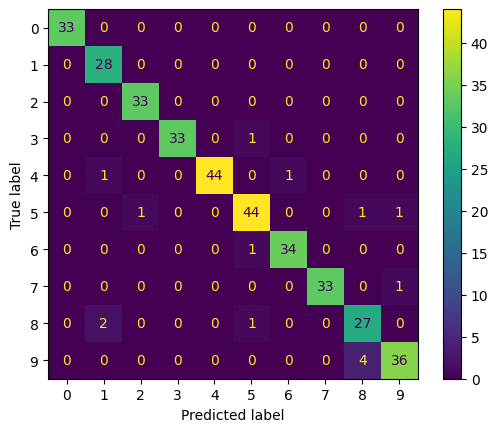

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
report = classification_report(y_test,y_pred)
print('Classification report ' + str(report))

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()
print(clf.classes_)

### **Reflection question**
Answer the following question: Based on the confusion matrix, which number was most frequently mistaken for other numbers?

#### **Solution**

The number 9 was most frequently mistaken for other numbers. It was mistaken (for number 8) four times.

<a name="p3"></a>

---
## **Part 3: [HOMEWORK] College Admissions Dataset**
---
#### **About the Dataset**
We've already explored this dataset; now it's time to create a logistic regression model using it! The college admissions dataset contains information on various factors that could influence admission decisions. The dataset includes attributes such as admission status (admit), Graduate Record Examination (GRE) score, Grade Point Average (GPA), socioeconomic status (SES), gender (Gender_Male), race, and undergraduate rank (rank). These features provide insights into the characteristics of applicants and their likelihood of being admitted to a college or university.

The features are as follows:

* `admit`: A binary indicator of whether the student was admitted or not (0: no, 1: yes)
* `gre`: Score obtained on the Graduate Record Examination (ranging from 200-800)
* `gpa`: Grade point average (out of 4.00)
* `ses`: Socioeconomic status (1: low, 2: medium, 3: high)
* `Gender_Male`: A binary indicator of whether the student is male or female (0: female, 1: male)
* `Race`: The race or ethnicity of applicants, which can be categorized into different groups (1: Hispanic, 2: Asian, 3: African American)
* `rank`: The rank or prestige level of applicants' undergraduate institutions, often represented as ordinal values (e.g., 1 = Highest rank, 4 = Lowest rank).


<br>

#### **Your Task**
Using the College Admissions dataset, we will do the following:
* Create a logistic regression model that can predict whether or not a student will be admitted into college


### **Step #1: Load the data**

Use the following code to load the college admissions dataset.

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/the-codingschool/TRAIN/main/college_admissions/Admission.xlsx"
admissions_df = pd.read_excel(url)
admissions_df.head()

,admit,gre,gpa,ses,Gender_Male,Race,rank
0,0,380,3.61,1,0,3,3
1,1,660,3.67,2,0,2,3
2,1,800,4.00,2,0,2,1
3,1,640,3.19,1,1,2,4
4,0,520,2.93,3,1,2,4


### **Step #2: Decide independent and dependent variables**

We are going to use `gre` and `gpa` as our independent variables for predicting `admit`.

#####**Solution**

In [ ]:
admissions_df[['admit', 'gre', 'gpa']]

,admit,gre,gpa
0,0,380,3.61
1,1,660,3.67
2,1,800,4.00
3,1,640,3.19
4,0,520,2.93
...,...,...,...
395,0,620,4.00
396,0,560,3.04
397,0,460,2.63
398,0,700,3.65


### **Step #3: Split the data into train and test sets**

###### **Solution**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(admissions_df[['gre', 'gpa']], admissions_df['admit'], test_size=0.2, random_state=42)

### **Step #4: Import the Logistic Regression algorithm**

###### **Solution**

In [ ]:
# import the logistic regression algorithm
from sklearn.linear_model import LogisticRegression

### **Step #5: Initialize the model**


#####**Solution**

In [ ]:
# initialize
clf = LogisticRegression()

### **Step #6: Fit your model and make predictions for the test data**

In [ ]:
#fit

y_pred = # COMPLETE THIS LINE

y_pred_proba = # COMPLETE THIS LINE

y_pred_binary = # COMPLETE THIS LINE

###### **Solution**

In [ ]:
#fit
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
#y_pred

y_pred_proba = clf.predict_proba(X_test)
#y_pred_proba

y_pred_binary = (y_pred_proba[:, 1] > 0.5).astype(int)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

### **Step #7: Evaluate the model**

Print the classification report and then plot the confusion matrix.


In [ ]:
report = # WRITE YOUR CODE HERE
print('Classification report ' + # COMPLETE THIS LINE

cm = # WRITE YOUR CODE HERE
disp = # WRITE YOUR CODE HERE
disp.plot()
plt.show()

###### **Solution**

Classification report               precision    recall  f1-score   support

           0       0.68      0.98      0.81        53
           1       0.75      0.11      0.19        27

    accuracy                           0.69        80
   macro avg       0.72      0.55      0.50        80
weighted avg       0.71      0.69      0.60        80



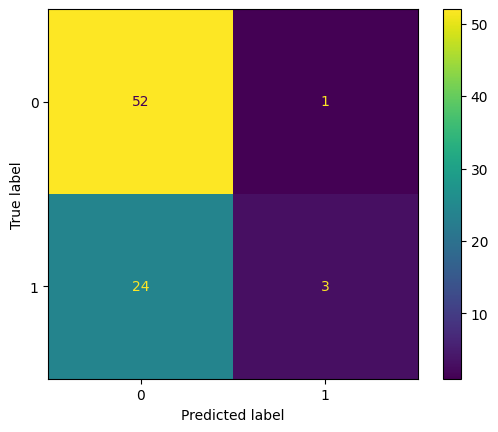

[0 1]


In [ ]:
report = classification_report(y_test,y_pred)
print('Classification report ' + str(report))

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()
print(clf.classes_)

### **Step #8: Use the model**

Using the model we created, predict whether or not the following two students will be admitted into college:

* **Student 1:** `gre` is 670 and `gpa` is 3.74

* **Student 2:**  `gre` is 780 and `gpa` is 3.92

**Note:** you must create a dataframe containing with the information of the new students:

```python
new_student_data = pd.DataFrame(new_student_data_here, columns = ["gre", "gpa"])
```

#####**Solution**

In [ ]:
new_student_data = pd.DataFrame([[670, 3.69], [780, 3.92]], columns =["gre", "gpa"])
new_prediction = clf.predict(new_student_data)
print('prediction: ', new_prediction)
# Student 1 will not be admitted
# Student 2 will be admitted

### **Reflection question**
Answer the following question: Based on its accuracy, do you think this model is a good way to predict the likelihood of college admissions?

#### **Solution**

It can be a way to get an okay idea of the likelihood of admission, but not a good way to get a confident answer since the accuracy of the model is less than ideal.

<a name="p4"></a>

---
## **Part 4: [HOMEWORK] Water Quality Dataset**
---

#### **About the Dataset**
Access to clean drinking water is essential for health and a basic human right, and yet nearly 2 billion people around the world do not have access to clean drinking water. In some regions it has been shown that investments in water supply and sanitation can result in a net economic benefit because reductions in health care costs and adverse health effects outweigh the costs of providing interventions.

The features are as follows:
* `Hardness`: capacity of water to precipitate soap in (mg/L)
* `Solids`: total dissolved solids (in ppm)
* `Chloramines`: amount of chloramines (in ppm)
* `Conductivity`: electrical conductivity of the water (in μS/cm)
* `Organic_carbon`: amount of organic carbon in ppm
* `Trihalomethanes`: amount of trihalomethanes (in μg/L)
* `Turbidity`: measure of light emitting property of water (in NTU)
* `Potability`: whether or not the water is safe for human consumption (0: no, 1: yes)

<br>

#### **Your Task**
Using the water quality dataset, we will do the following:
* Create a logistic regression model that can predict whether or not water is safe for drinking

### **Step #1: Load the data**

Use the following code to load the drinking water dataset.

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/the-codingschool/TRAIN/main/drinking_water/drinking_water_cleaned.csv"
df = pd.read_csv(url).drop("Unnamed: 0", axis=1)
df.head()

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,204.890455,20791.318981,7.300212,564.308654,10.379783,86.990970,2.963135,0
1,129.422921,18630.057858,6.635246,592.885359,15.180013,56.329076,4.500656,0
2,224.236259,19909.541732,9.275884,418.606213,16.868637,66.420093,3.055934,0
3,214.373394,22018.417441,8.059332,363.266516,18.436524,100.341674,4.628771,0
4,181.101509,17978.986339,6.546600,398.410813,11.558279,31.997993,4.075075,0


### **Step #2: Decide independent and dependent variables**

We are going to use all features except `Potability` as our independent variables for predicting `Potability`.

#####**Solution**

In [ ]:
X = df.drop('Potability', axis=1)

### **Step #3: Split the data into train and test sets**

###### **Solution**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, df['Potability'], test_size=0.2, random_state=42)

### **Step #4: Import the Logistic Regression algorithm**


###### **Solution**

In [ ]:
# import the logistic regression algorithm
from sklearn.linear_model import LogisticRegression

### **Step #5: Initialize the model**

#####**Solution**

In [ ]:
# initialize
clf = LogisticRegression(random_state=7921723)

### **Step #6: Fit your model and make predictions for the test data**

In [ ]:
#fit

y_pred = # COMPLETE THIS LINE

y_pred_proba = # COMPLETE THIS LINE

y_pred_binary = # COMPLETE THIS LINE

###### **Solution**

In [ ]:
#fit
clf.fit(X_train, y_train.values.ravel())

y_pred = clf.predict(X_test)
#y_pred

y_pred_proba = clf.predict_proba(X_test)
#y_pred_proba

y_pred_binary = (y_pred_proba[:, 1] > 0.5).astype(int)

### **Step #7: Evaluate the model**

Print the classification report and then plot the confusion matrix.


In [ ]:
report = # WRITE YOUR CODE HERE
print('Classification report ' + # COMPLETE THIS LINE

cm = # WRITE YOUR CODE HERE
disp = # WRITE YOUR CODE HERE
disp.plot()
plt.show()

###### **Solution**

Classification report               precision    recall  f1-score   support

           0       0.65      1.00      0.79       405
           1       0.00      0.00      0.00       218

    accuracy                           0.65       623
   macro avg       0.33      0.50      0.39       623
weighted avg       0.42      0.65      0.51       623



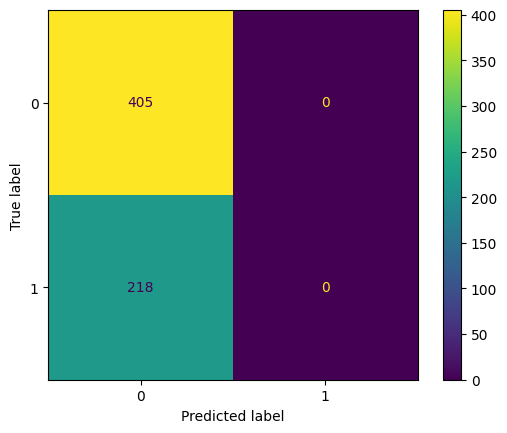

[0 1]


In [ ]:
report = classification_report(y_test,y_pred)
print('Classification report ' + str(report))

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()
print(clf.classes_)

### **Reflection questions**
Answer the following questions:

1. In the case of determining whether or not drinking water is safe, do you think it's more important to reduce false positives or false negatives?
2. Did you notice anything strange about the confusion matrix?
3. Is the model good to use?

#### **Solution**

1. It is more important to reduce false positives because if the water is incorrectly deemed to be safe, people could become ill from consuming it.

2. The model only predicted that the water is not safe to consume.

3. No, because the model just assumes that the water is not safe to drink.

---
#End of Notebook

© 2023 The Coding School, All rights reserved